## Observations and Insights 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_merge = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mice_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [63]:
# List of column names
mice_merge.columns.to_list()

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [64]:
# Checking the number of mice.
print("Number of unique mice: " + str(len(mice_merge["Mouse ID"].value_counts())))


# Total number of rows (including duplicates)
print("Number of rows in DataFrame: " + str(len(mice_merge)))

Number of unique mice: 249
Number of rows in DataFrame: 1893


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test = mice_merge[mice_merge.duplicated()].duplicated()
duplicated_ID = test.index.to_list()
bad_mouse_ID = mice_merge.loc[duplicated_ID[0], 'Mouse ID']
print(bad_mouse_ID)

g989


In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_merge[mice_merge.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_merge_cleaned = mice_merge[mice_merge["Mouse ID"] != bad_mouse_ID]

In [68]:
# Checking the number of mice in the clean DataFrame.
len(mice_merge_cleaned)

1880

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_merge_maxtp = mice_merge_cleaned.loc[mice_merge_cleaned.groupby("Mouse ID")["Timepoint"].idxmax()]
mice_merge_groupby = mice_merge_maxtp.groupby("Drug Regimen")

TV_mean = mice_merge_groupby["Tumor Volume (mm3)"].mean()
TV_median = mice_merge_groupby["Tumor Volume (mm3)"].median()
TV_var = mice_merge_groupby["Tumor Volume (mm3)"].var()
TV_std = mice_merge_groupby["Tumor Volume (mm3)"].std()
TV_sem = mice_merge_groupby["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":TV_mean, 
                           "Median":TV_median, 
                           "Variance":TV_var, 
                           "Standard_Deviation":TV_std,
                           "Standard_Error":TV_sem})

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

display(summary_df)

# Using the aggregation method, produce the same summary statistics in a single line

mice_merge_maxtp.groupby("Drug Regimen").agg(
                                              Mean = ("Tumor Volume (mm3)", 'mean'), 
                                              Median = ("Tumor Volume (mm3)", 'median'),
                                              Variance = ("Tumor Volume (mm3)", 'var'),
                                              Standard_Deviation = ("Tumor Volume (mm3)", 'std'),
                                              Standard_Error = ("Tumor Volume (mm3)", 'sem')
                                             )

,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

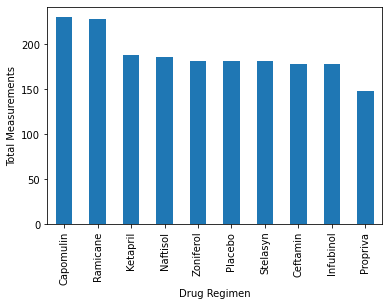

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measures_per_mouse = mice_merge_cleaned.groupby(["Drug Regimen", "Mouse ID"]).count()
measures_per_drug = measures_per_mouse.groupby("Drug Regimen").sum()
measures_per_drug_sorted = measures_per_drug.sort_values("Sex", ascending = False)

drug_measurements_bar = measures_per_drug_sorted["Sex"].plot(kind = "bar")
drug_measurements_bar.set_ylabel("Total Measurements")
plt.show()

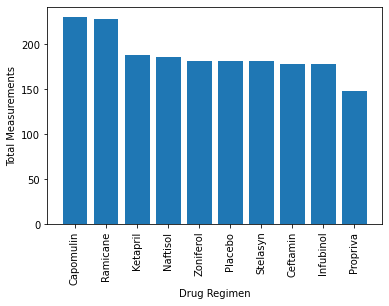

In [83]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = measures_per_drug_sorted.index.to_list()
counts = measures_per_drug_sorted["Sex"].to_list()


x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, counts)
plt.xticks(tick_locations, labels = drugs, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

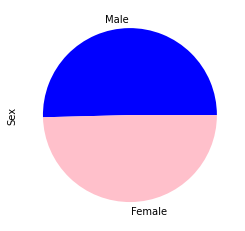

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_unique = mice_merge_cleaned.drop_duplicates("Mouse ID")
mice_sex = mice_unique["Sex"].value_counts()

sex_pie = mice_sex.plot(kind = "pie", colors = ["blue", "pink"])

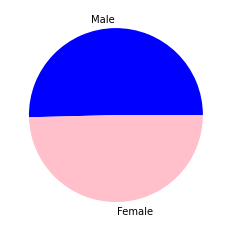

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_counts = mice_sex.to_list()
sex_labels = mice_sex.index.to_list()

plt.pie(mice_sex_counts, labels = sex_labels, colors = ["blue", "pink"])
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
